<a href="https://colab.research.google.com/github/neon-iot/communication_labs/blob/main/lie_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detector de Mentiras

In [ ]:
import numpy as np
nb_hypothesis = 20000
alpha = 1
beta = 20
p_lye = 0.5
p_truth = 0.5

np.random.seed(1234)
# Hypothesis source : TRUE (1) False (0)
def get_hypothesis(p_true,nb):
  p_lye = 1 - p_true
  out = np.random.choice(2,nb,p=[p_true,p_lye])
  return out
hypothesis = get_hypothesis(p_truth,nb_hypothesis)
# Output of brain cell activity instrument
def get_brain_activity(hypothesis, alfa, beta):
  out = [np.random.exponential(1/alfa) if hypothesis[i]==1 else np.random.exponential(1/beta) for i in range(len(hypothesis)) ]
  return out
observation = get_brain_activity(hypothesis, alpha, beta)

# Lyier Detector
def detect(input, alpha, beta, p_true):
  p_lye = 1 - p_true
  theta = 1/(beta-alpha) * np.log( (p_lye*beta)/(p_true*alpha))
  out_hypothesis = [1 if input[i]>theta else 0 for i in range(len(input))]
  return [theta, out_hypothesis]

theta, hyp_detected = detect(observation, alpha, beta, p_truth)
error = [1 if hypothesis[i]!= hyp_detected[i] else 0 for i in range(nb_hypothesis)]
print(np.sum(error)/nb_hypothesis)  
#print(error)
#print(hypothesis)
#print(observation)
#print(hyp_detected)
#print(theta)

0.0963


In [ ]:
def simulador_pe(alpha, beta, p_truth, nb):
  hypothesis = get_hypothesis(p_truth,nb)
  observation = get_brain_activity(hypothesis, alpha, beta)
  [theta, hyp_detected] = detect(observation, alpha, beta, p_truth)
  error = [1 if hypothesis[i]!= hyp_detected[i] else 0 for i in range(nb)]
  #print(hypothesis)
  #print(observation)
  #print(hyp_detected)
  #print(theta)
  #print(error)
  return (np.sum(error)/nb)

nb_hypothesis = 10000
alpha = 1
beta = 20
p_truth = 0.5

#print(detect([1.56],alpha,beta,0.5))
pe = simulador_pe(alpha, beta, p_truth, nb_hypothesis)
print(pe)
#print(hypothesis)
#print(observation)
#print(hyp_detected)
#np.random.choice(2,nb_hypothesis,p )

0.0882


(array([[727., 207.,  53.,   8.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [351., 217., 158., 100.,  61.,  42.,  33.,  11.,  10.,   6.,   5.,
           3.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.]]),
 array([8.69388771e-04, 1.28391301e+00, 2.56695663e+00, 3.85000025e+00,
        5.13304388e+00, 6.41608750e+00, 7.69913112e+00, 8.98217474e+00,
        1.02652184e+01, 1.15482620e+01, 1.28313056e+01, 1.41143492e+01,
        1.53973929e+01, 1.66804365e+01, 1.79634801e+01, 1.92465237e+01,
        2.05295673e+01, 2.18126110e+01, 2.30956546e+01, 2.43786982e+01,
        2.56617418e+01]),
 <a list of 2 Lists of Patches objects>)

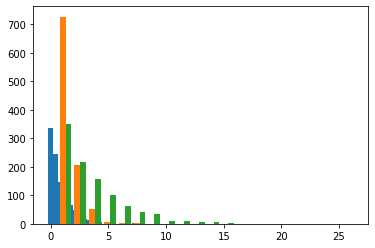

In [ ]:
import matplotlib.pyplot as plt

y_truth = np.random.exponential(1,1000)
plt.hist(y_truth,20,align='left')
y_lyier = np.random.exponential(3,1000)
plt.hist([y_truth, y_lyier],20,align='right')